In [23]:
import shap
import sklearn
import numpy as np
import xgboost
import pandas

In [25]:
with open("/data/ctu/5/features.txt") as infile:
    data = np.loadtxt(infile, delimiter=",")
    
    y = data[:, 0]
    X = data[:, 1:]
    
    X = pandas.DataFrame(X, columns=[
        "Src_Ave_SrcTotalBytes", "Src_Var_SrcTotalBytes",
        "Src_Ave_DestTotalBytes", "Src_Var_DestTotalBytes",
        "Src_Ave_Duration", "Src_Var_Duration",
        "Src_Ave_SrcPayloadBytes", "Src_Var_SrcPayloadBytes",
        "Src_Ave_DestPayloadBytes", "Src_Var_DestPayloadBytes",
        "Src_Ave_FirstSeenSrcPacketCount","Src_Var_FirstSeenSrcPacketCount",
        "Src_Ave_FirstSeenDestPacketCount","Src_Var_FirstSeenDestPacketCount",
        "Dest_Ave_SrcTotalBytes", "Dest_Var_SrcTotalBytes",
        "Dest_Ave_DestTotalBytes", "Dest_Var_DestTotalBytes",
        "Dest_Ave_Duration", "Dest_Var_Duration",
        "Dest_Ave_SrcPayloadBytes", "Dest_Var_SrcPayloadBytes",
        "Dest_Ave_DestPayloadBytes", "Dest_Var_DestPayloadBytes",
        "Dest_Ave_FirstSeenSrcPacketCount","Dest_Var_FirstSeenSrcPacketCount",
        "Dest_Ave_FirstSeenDestPacketCount","Dest_Var_FirstSeenDestPacketCount"])
    
    model = xgboost.XGBRegressor().fit(X,y)
    

In [26]:
explainer = shap.Explainer(model)

In [27]:
shap_values = explainer(X)

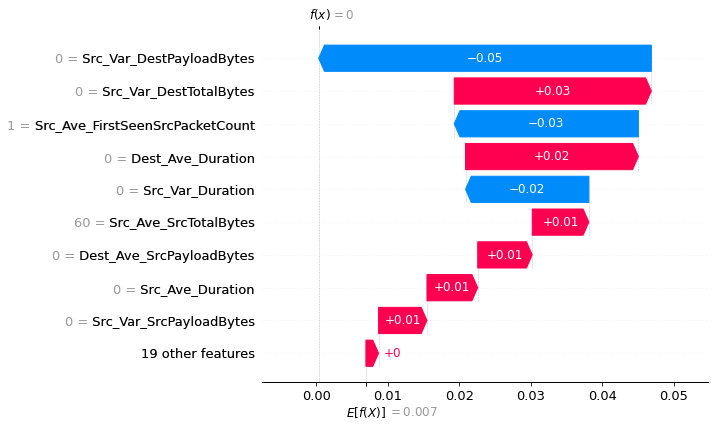

In [28]:
shap.plots.waterfall(shap_values[0]) # Benign example

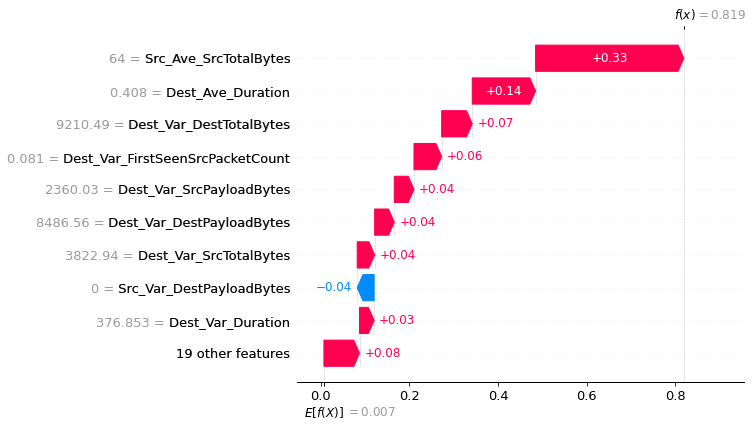

In [29]:
shap.plots.waterfall(shap_values[45650]) # Malicious example